In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

import pandas as pd
import numpy as np

## 1) 체육시설 창/폐업 수

In [2]:
df1 = pd.read_csv('data/인허가/골프연습장.csv', encoding='cp949')
df1 = df1.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df2 = pd.read_csv('data/인허가/골프장.csv', encoding='cp949')
df2 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df3 = pd.read_csv('data/인허가/당구장업.csv', encoding='cp949')
df3 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df4 = pd.read_csv('data/인허가/등록체육시설업.csv', encoding='cp949')
df4 = df4.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df5 = pd.read_csv('data/인허가/무도장업.csv', encoding='cp949')
df5 = df5.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df6 = pd.read_csv('data/인허가/무도학원업.csv', encoding='cp949')
df6 = df6.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df7 = pd.read_csv('data/인허가/빙상장업.csv', encoding='cp949')
df7 = df7.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df8 = pd.read_csv('data/인허가/수영장업.csv', encoding='cp949')
df8 = df8.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df9 = pd.read_csv('data/인허가/스키장.csv', encoding='cp949')
df9 = df9.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df10 = pd.read_csv('data/인허가/승마장업.csv', encoding='cp949')
df10 = df10.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df11 = pd.read_csv('data/인허가/썰매장업.csv', encoding='cp949')
df11 = df11.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df12 = pd.read_csv('data/인허가/요트장업.csv', encoding='cp949')
df12 = df12.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df13 = pd.read_csv('data/인허가/종합체육시설업.csv', encoding='cp949')
df13 = df13.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df14 = pd.read_csv('data/인허가/체력단련장업.csv', encoding='cp949')
df14 = df14.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df15 = pd.read_csv('data/인허가/체육도장업.csv', encoding='cp949')
df15 = df15.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,20,25,26,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])
df

,개방서비스명,인허가일자,폐업일자,좌표정보(x),좌표정보(y)
0,골프연습장업,20040309,NaN,212562.6164,443174.220700
1,골프연습장업,20070508,NaN,176660.864,448048.231900
2,골프연습장업,20021025,NaN,174426.8522,447457.664500
3,골프연습장업,20001201,NaN,244015.8142,348104.593800
4,골프연습장업,20010928,NaN,245051.8092,345435.361700
...,...,...,...,...,...
17629,체력단련장업,20100125,NaN,218027,448919.023505
17630,체력단련장업,20081104,NaN,190251,453017.867203
17631,체력단련장업,20170504,NaN,203899,443655.849953
17632,체력단련장업,20090224,NaN,207531,184572.389317


In [4]:
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')

In [5]:
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

In [6]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

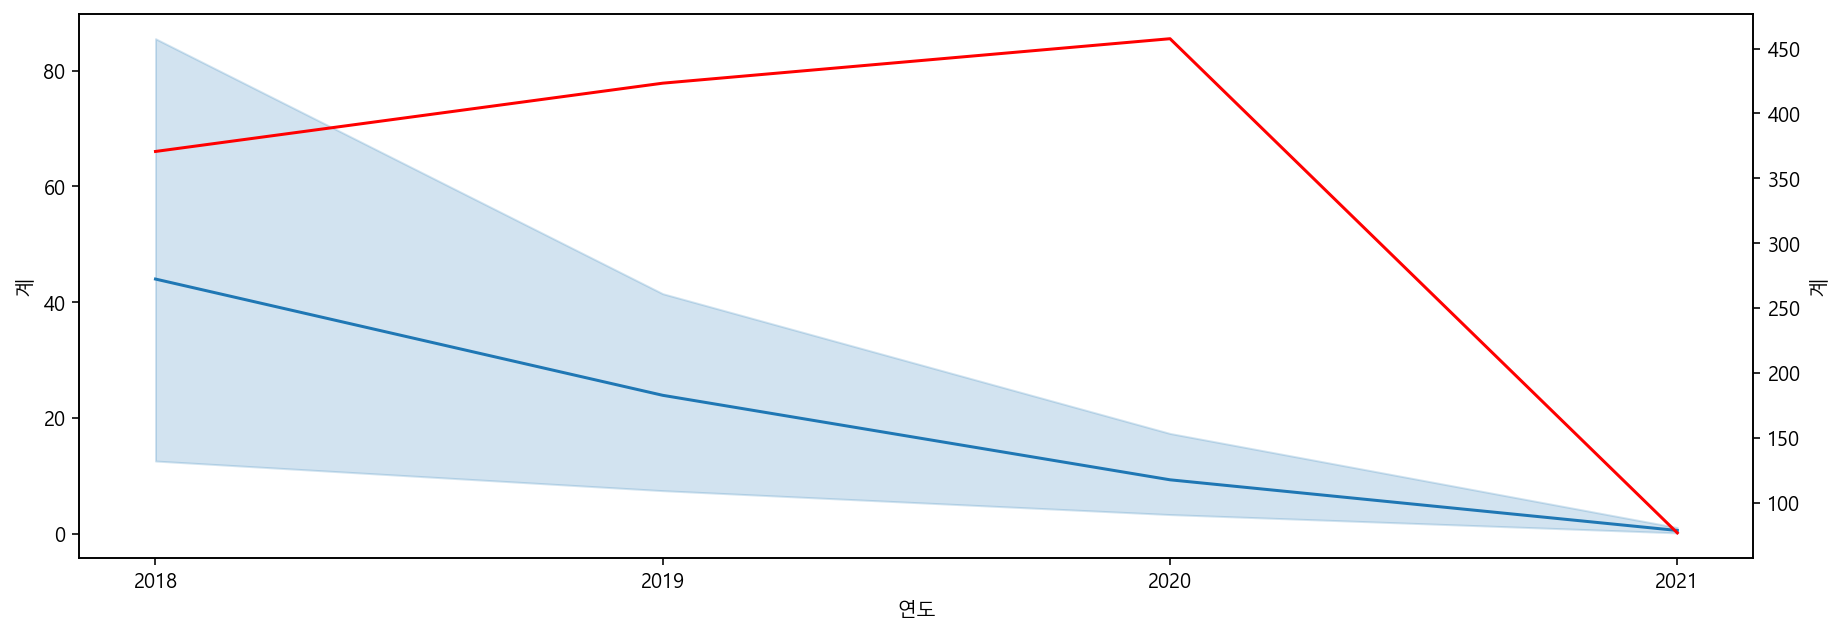

In [7]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1 = sns.lineplot(x='연도', y='계', data=df_open, ax=ax1)
ax2 = sns.lineplot(x='연도', y='계', data=df_close, ax=ax2, ci=None, color='red')
ax1.set_xticks([2018,2019,2020,2021])

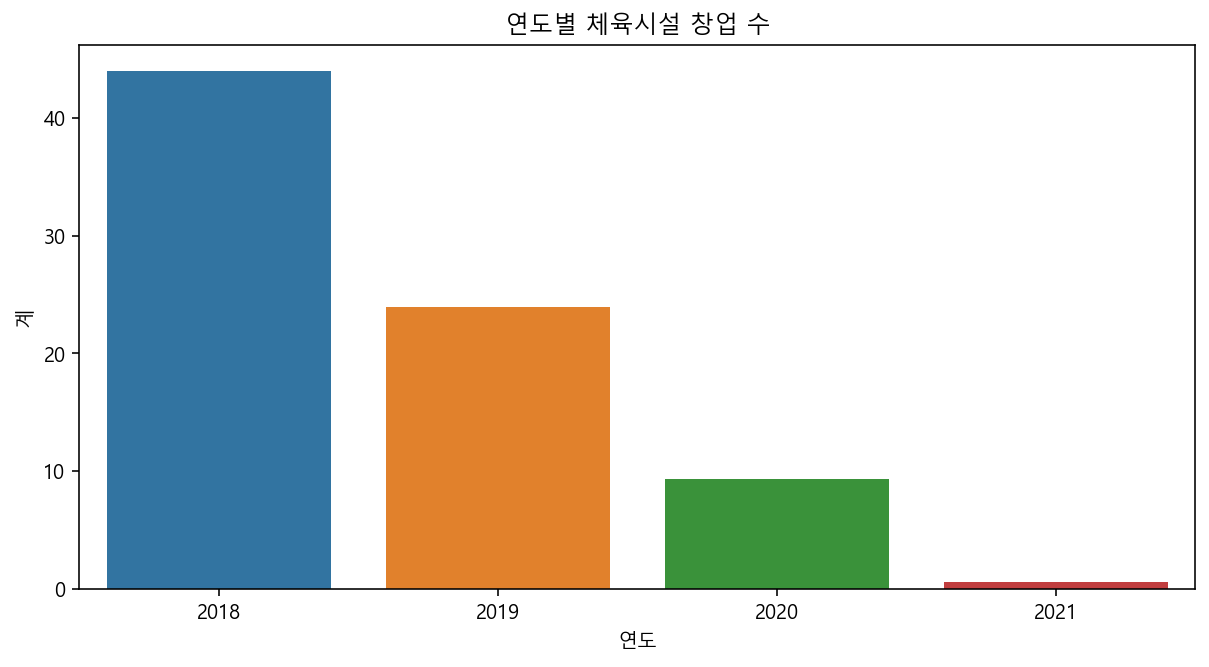

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 체육시설 창업 수')
plt.savefig('data2/연도별_체육시설_창업수.jpg')

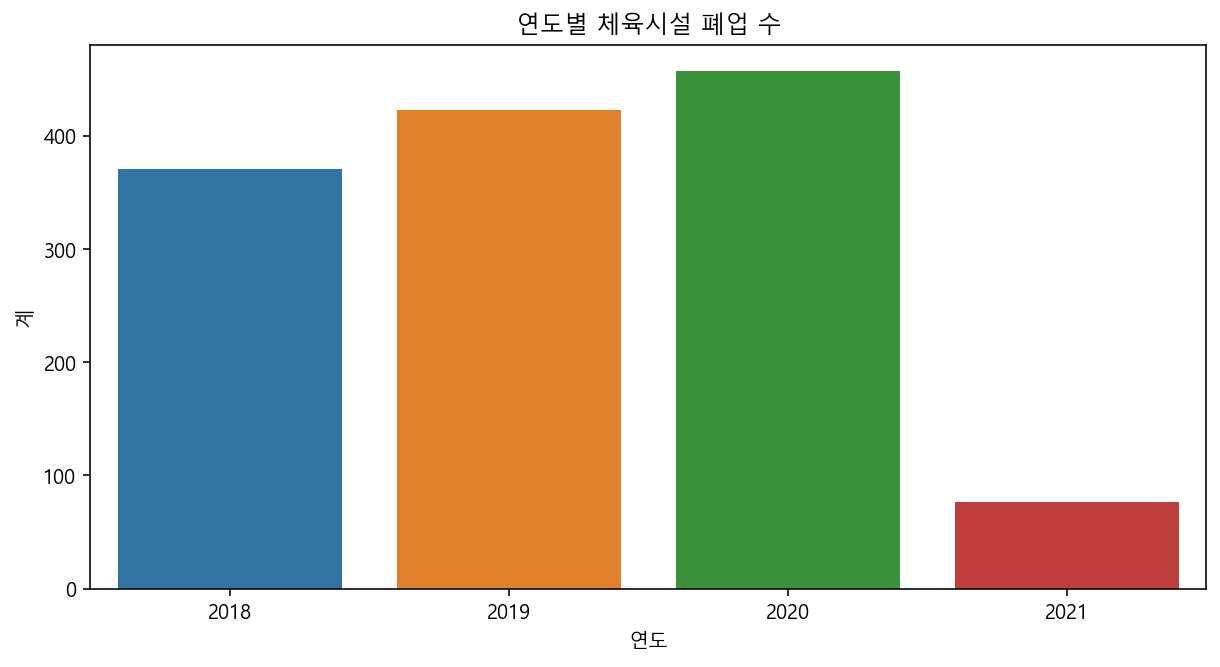

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 체육시설 폐업 수')
plt.savefig('data2/연도별_체육시설_폐업수.jpg')

<AxesSubplot:xlabel='구분', ylabel='계'>

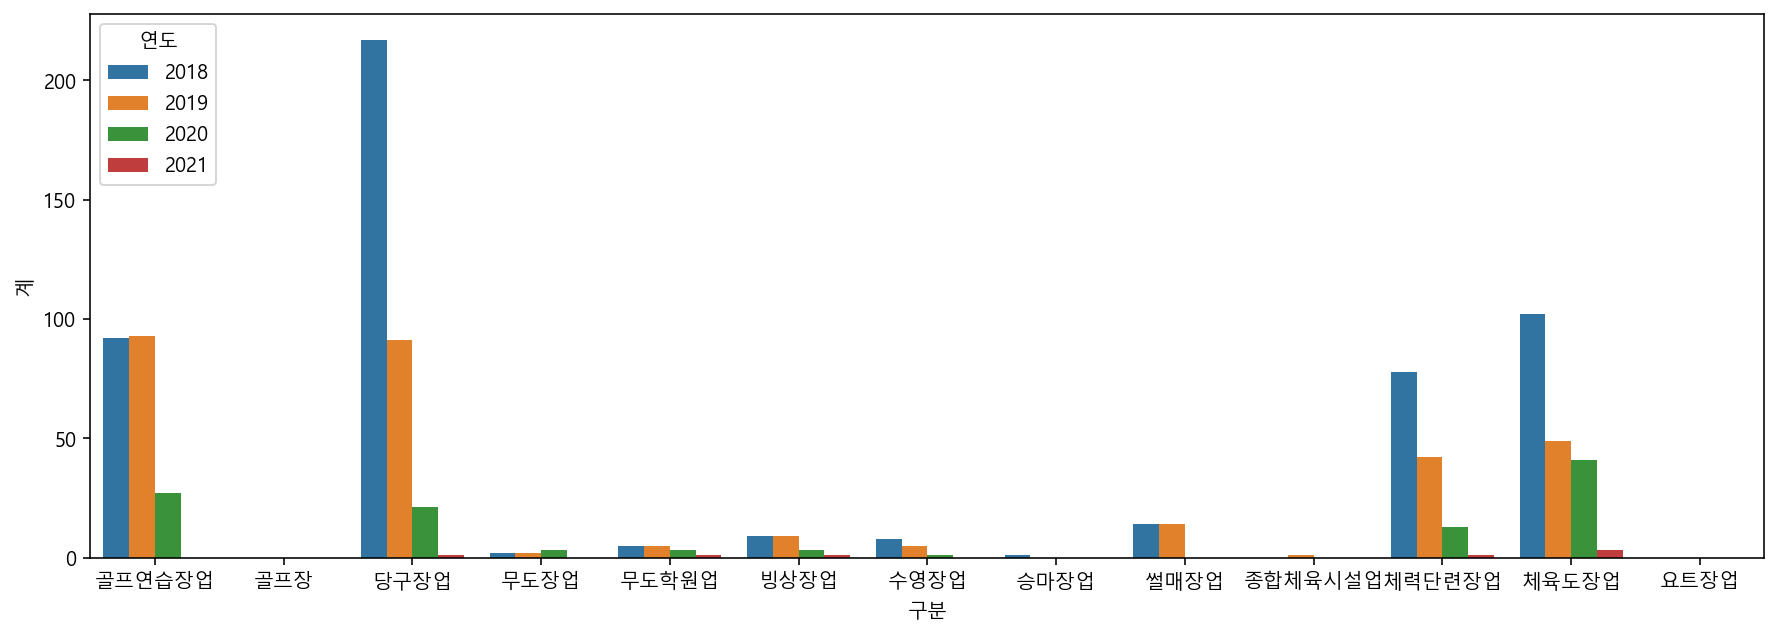

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='구분', y='계', hue='연도', data=df_open, ci=None)

<AxesSubplot:xlabel='구분', ylabel='계'>

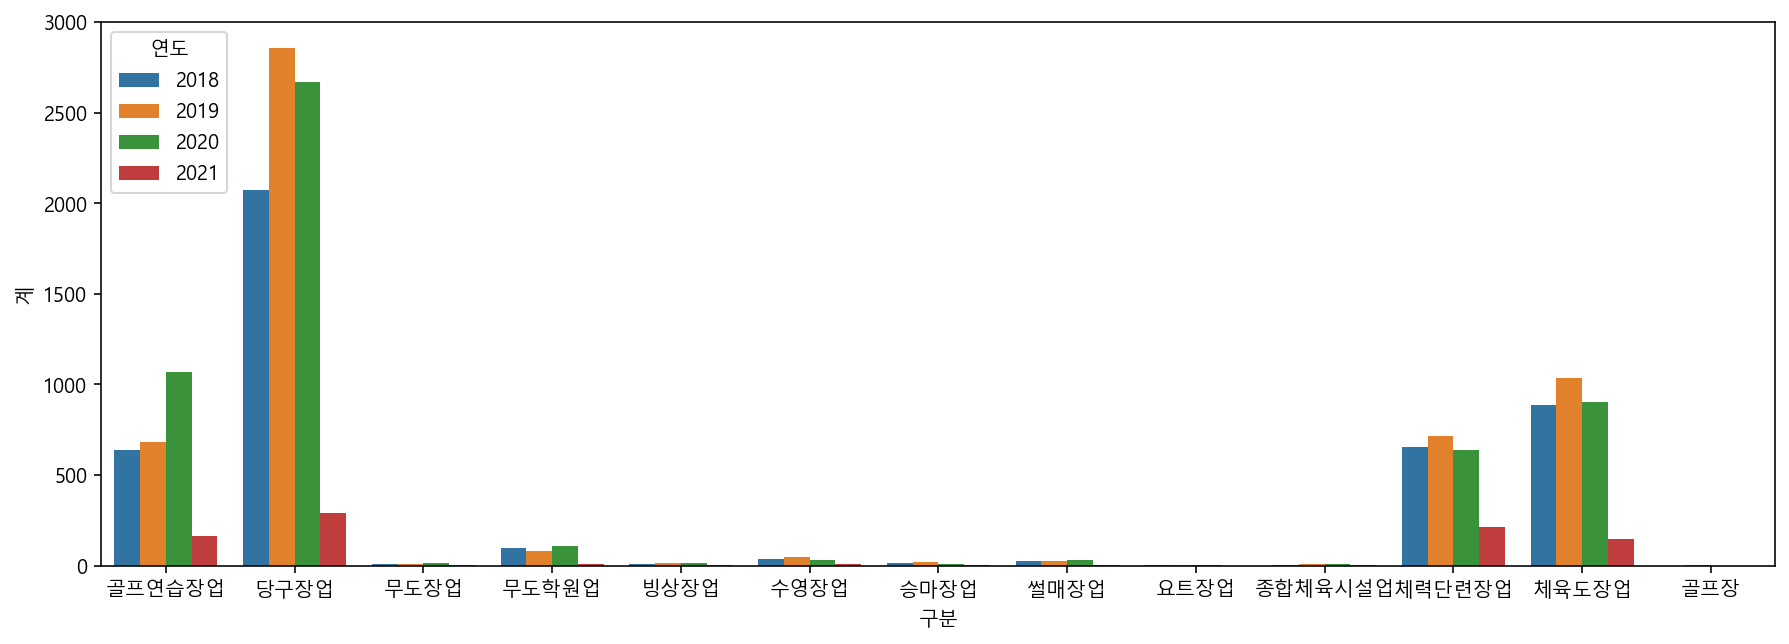

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='구분', y='계', hue='연도', data=df_close, ci=None)

- 연도별 창업 체육시설 수

<AxesSubplot:xlabel='연도'>

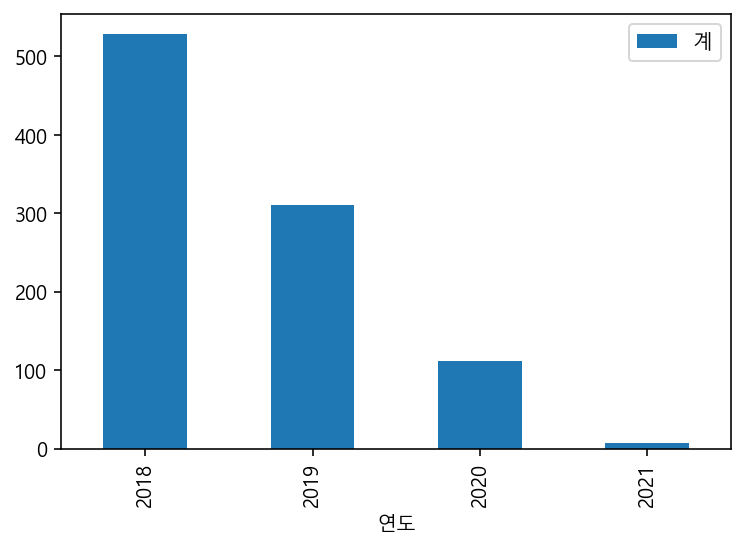

In [294]:
df_open.groupby('연도').sum().plot(kind='bar')

- 연도별 폐업 체육시설 수

<AxesSubplot:xlabel='연도'>

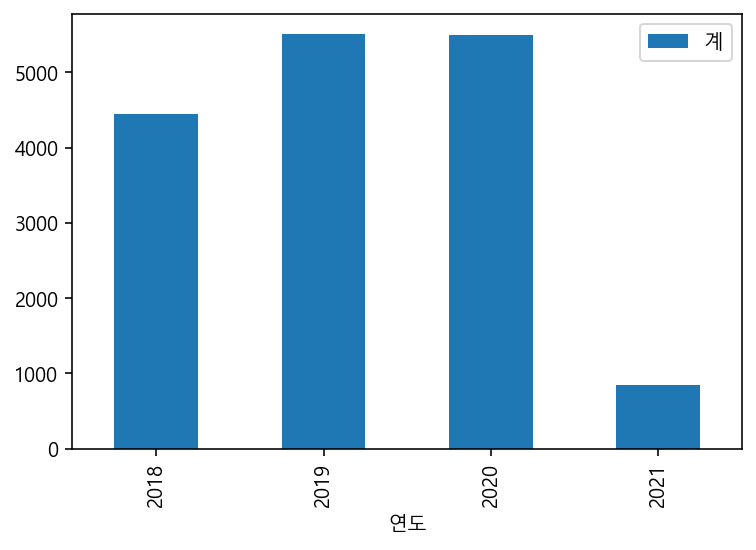

In [115]:
df_close.groupby('연도').sum().plot(kind='bar')

## 2) 관광시설 창/폐업 수

In [144]:
df1 = pd.read_csv('data/인허가/fulldata_03_12_01_P_국내여행업.csv', encoding='cp949')
df1 = df1.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df2 = pd.read_csv('data/인허가/fulldata_03_12_02_P_국외여행업.csv', encoding='cp949')
df2 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]
df3 = pd.read_csv('data/인허가/fulldata_03_12_03_P_일반여행업.csv', encoding='cp949')
df3 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자', '좌표정보(x)', '좌표정보(y)']]

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [145]:
df = pd.concat([df1, df2, df3])
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')

In [146]:
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

In [147]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

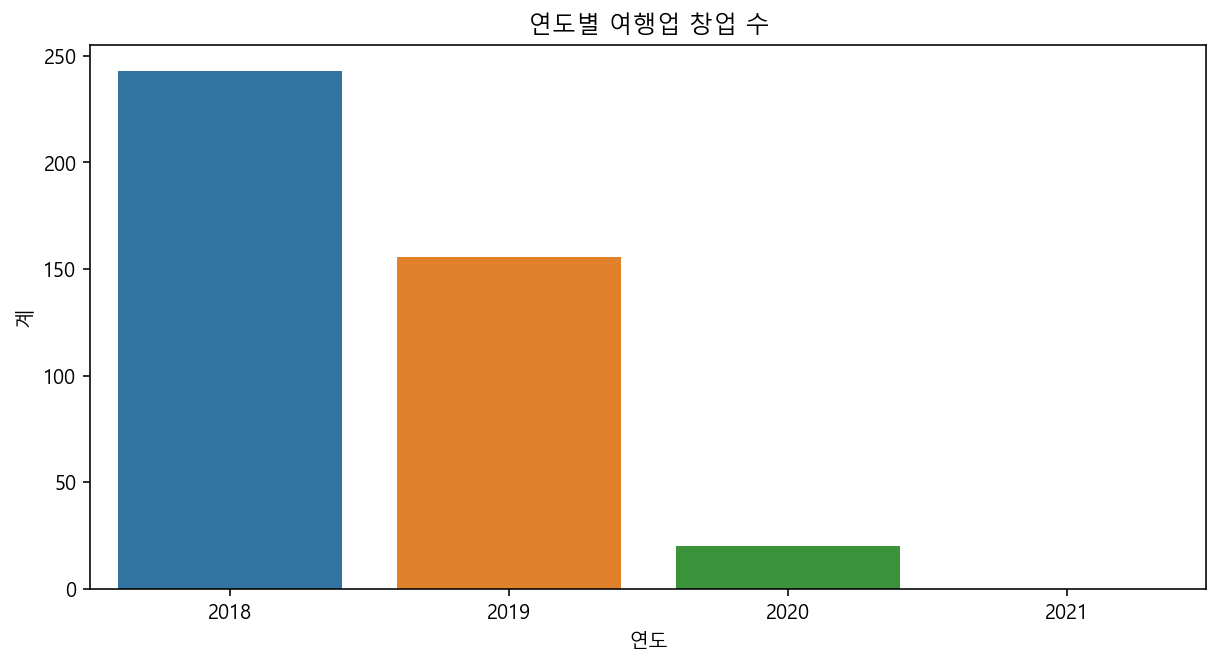

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 여행업 창업 수')
plt.savefig('data2/연도별_여행관련업체_창업수.jpg')

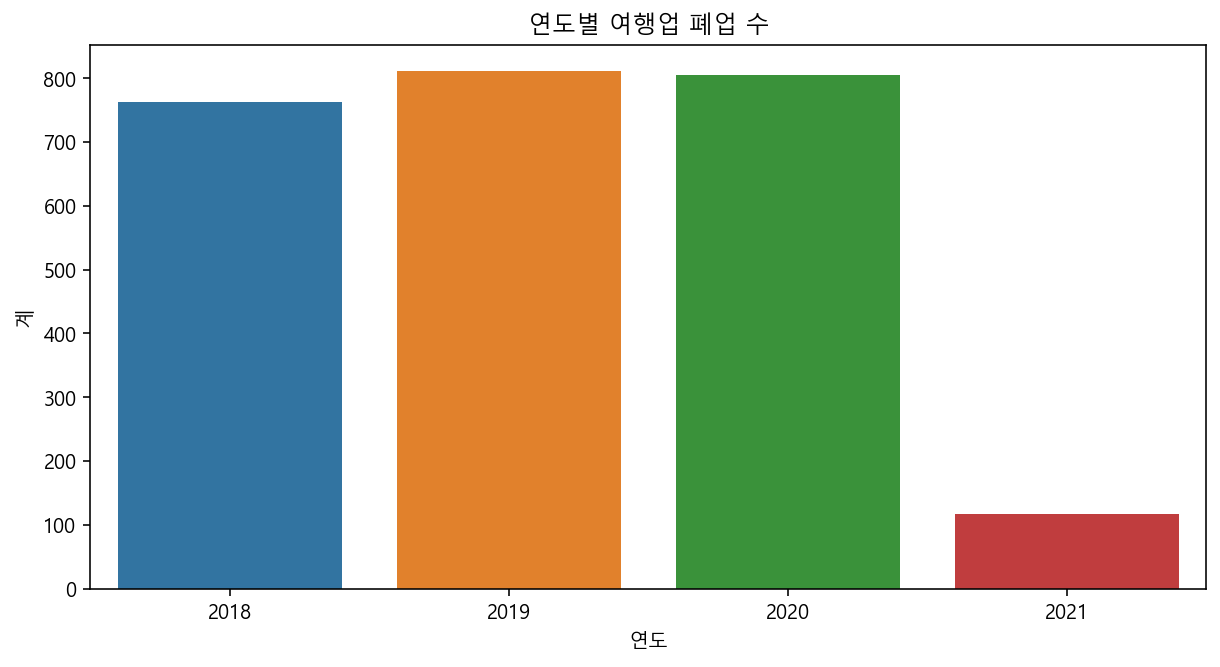

In [149]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 여행업 폐업 수')
plt.savefig('data2/연도별_여행관련업체_폐업수.jpg')

## 3) 노래방 창/폐업수

In [150]:
df = pd.read_csv('data/인허가/fulldata_03_09_01_P_노래연습장업.csv', encoding='CP949')
df = df.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

C:\Users\tjoeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [151]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

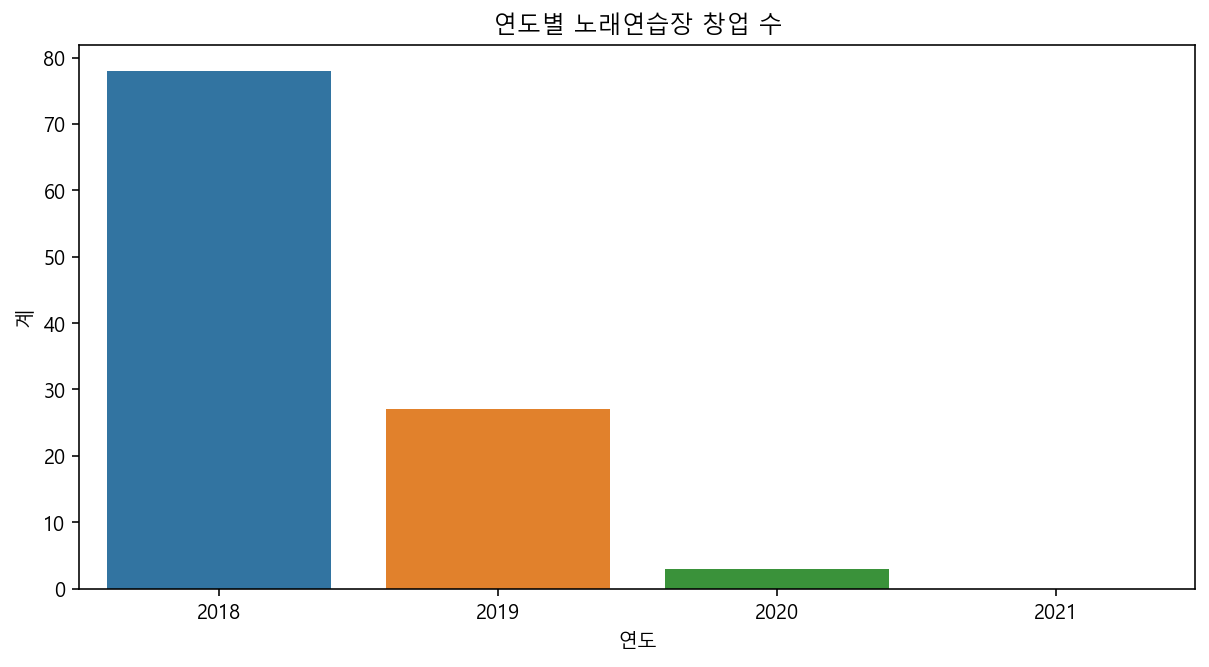

In [152]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 노래연습장 창업 수')
plt.savefig('data2/연도별_노래연습장_창업수.jpg')

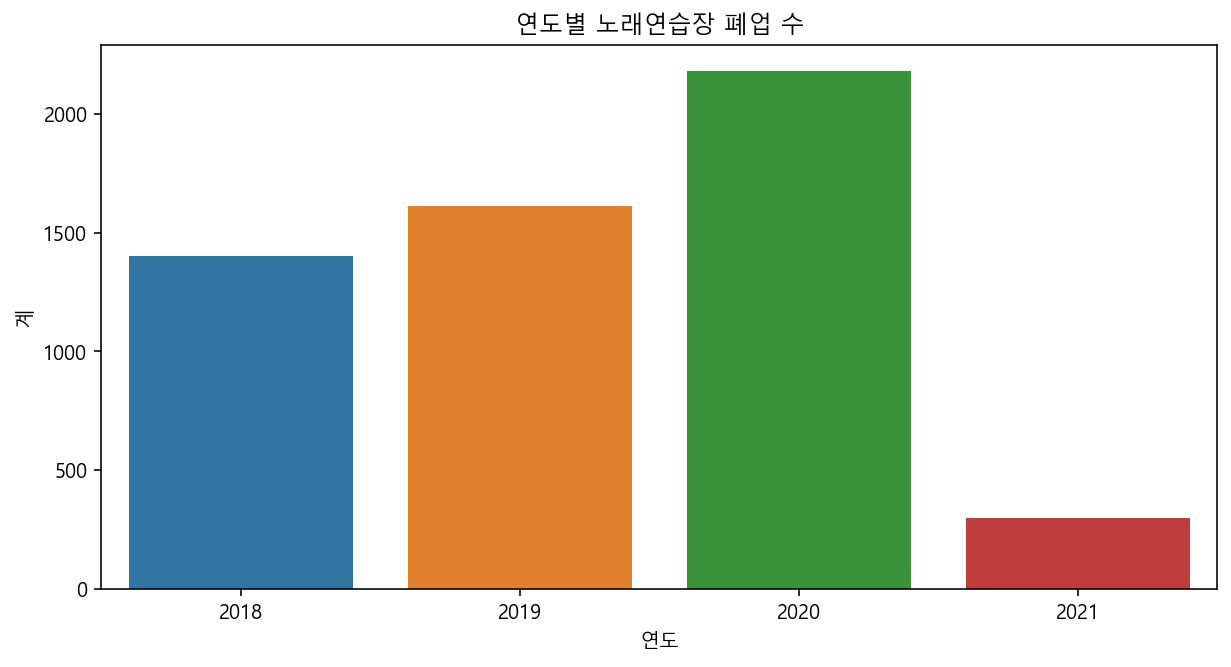

In [153]:
plt.figure(figsize=(10,5))
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 노래연습장 폐업 수')
plt.savefig('data2/연도별_노래연습장_폐업수.jpg')

## 4) 영화 창/폐업수
- 영화배급업, 영화상영관, 영화수입업, 영화제작업

In [154]:
df1 = pd.read_csv('data/인허가/fulldata_03_13_01_P_영화배급업.csv', encoding='cp949')
df1 = df1.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df2 = pd.read_csv('data/인허가/fulldata_03_13_02_P_영화상영관.csv', encoding='cp949')
df2 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df3 = pd.read_csv('data/인허가/fulldata_03_13_03_P_영화상영업.csv', encoding='cp949')
df3 = df2.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df4 = pd.read_csv('data/인허가/fulldata_03_13_04_P_영화수입업.csv', encoding='cp949')
df4 = df4.loc[:,['개방서비스명', '인허가일자', '폐업일자']]
df5 = pd.read_csv('data/인허가/fulldata_03_13_05_P_영화제작업.csv', encoding='cp949')
df5 = df5.loc[:,['개방서비스명', '인허가일자', '폐업일자']]

In [155]:
df = pd.concat([df1, df2, df3, df4, df5])
df['창업년도'] = df['인허가일자'].apply(lambda x:str(x)[:4])
df['폐업년도'] = df['폐업일자'].apply(lambda x:str(x)[:4])
df['창업년도'] = pd.to_numeric(df['창업년도'], errors='coerce')
df['폐업년도'] = pd.to_numeric(df['폐업년도'], errors='coerce')
df_open = df[(df['창업년도']>=2018) & (df['창업년도']<2022)]
df_close = df[(df['폐업년도']>=2018) & (df['폐업년도']<2022)]
df_open = df_open.loc[:, ['개방서비스명', '창업년도','폐업년도']]
df_close = df_close.loc[:, ['개방서비스명', '창업년도','폐업년도']]

In [156]:
df_open = df_open.groupby(['창업년도', '개방서비스명']).count()
df_open.reset_index(inplace=True)
df_open.columns = ['연도', '구분', '계']
df_close = df_close.pivot_table(index=['폐업년도', '개방서비스명'], aggfunc='count')
df_close.reset_index(inplace=True)
df_close.columns = ['연도', '구분', '계']
df_close['연도'] = df_close['연도'].apply(lambda x:int(x))

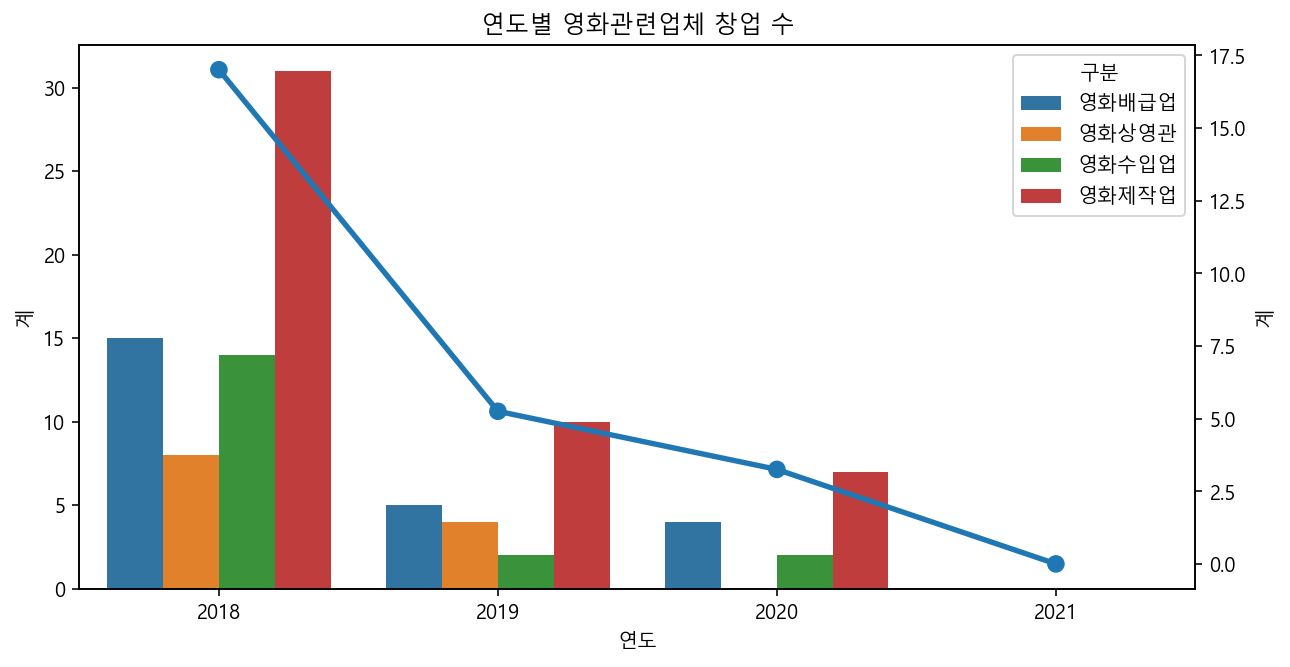

In [157]:
#ax.set_xticks([2018, 2019, 2020, 2021])
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연도', y='계', hue='구분', data=df_open, ax=ax1, ci=None)
ax2 = sns.pointplot(x='연도', y='계', data=df_open, ax=ax2, ci=None, alpha=0.5)
plt.title('연도별 영화관련업체 창업 수')
plt.savefig('data2/연도별_영화관련업체_구분별_창업추이.jpg')

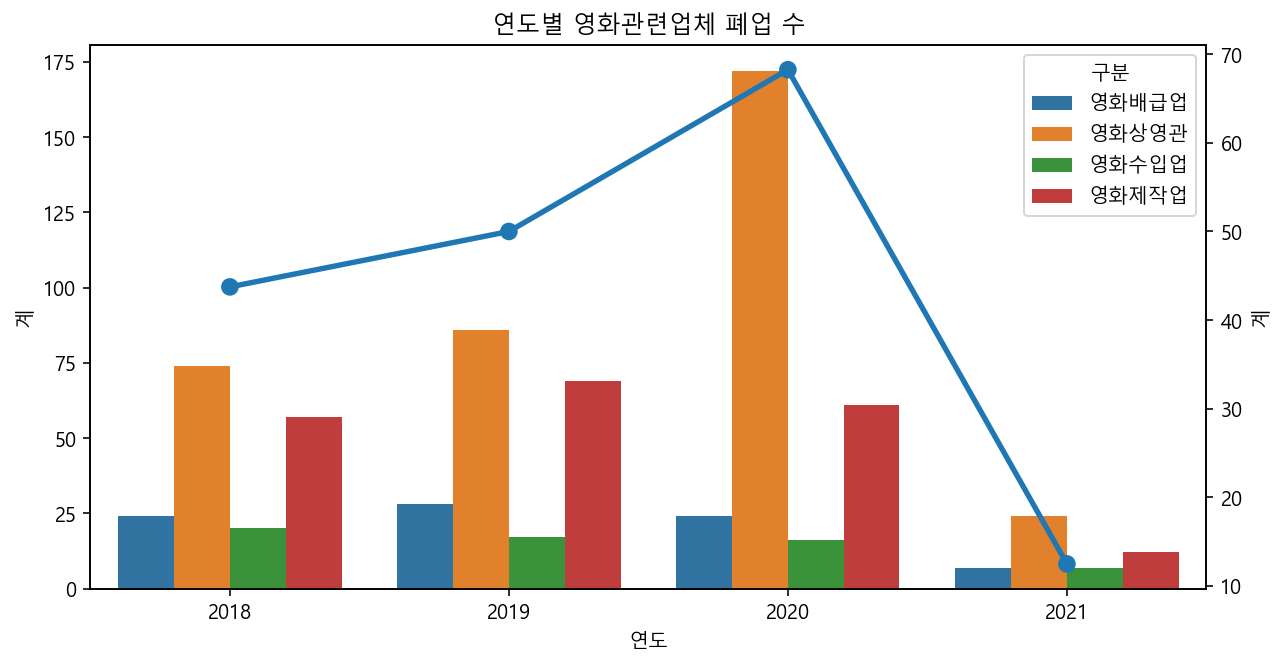

In [158]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연도', y='계', hue='구분', data=df_close, ax=ax1, ci=None)
ax2 = sns.pointplot(x='연도', y='계', data=df_close, ax=ax2, ci=None, alpha=0.5)
#ax.set_xticks([2018, 2019, 2020, 2021])
plt.title('연도별 영화관련업체 폐업 수')
plt.savefig('data2/연도별_영화관련업체_구분별_폐업추이.jpg')

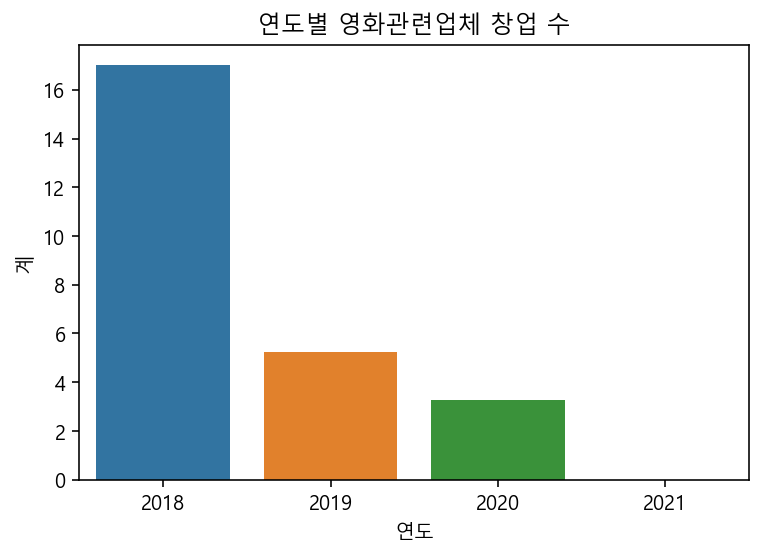

In [159]:
sns.barplot(x='연도', y='계', data=df_open, ci=None)
plt.title('연도별 영화관련업체 창업 수')
plt.savefig('data2/연도별_영화관련업체_창업수.jpg')

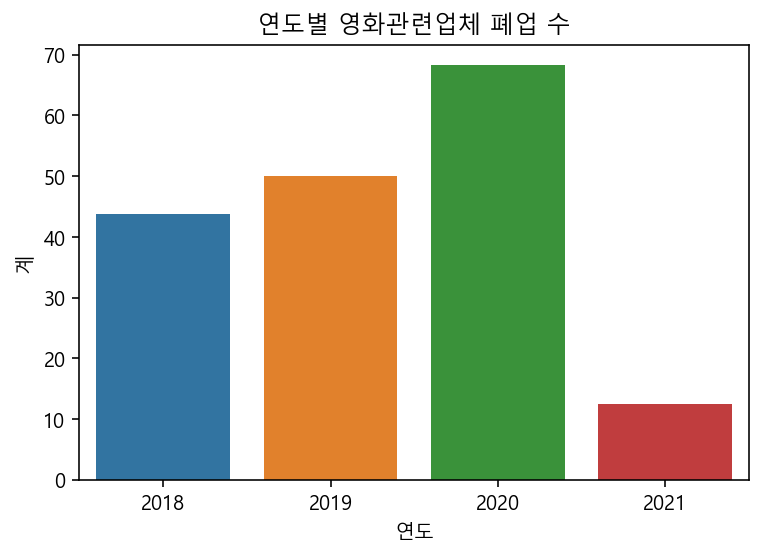

In [160]:
sns.barplot(x='연도', y='계', data=df_close, ci=None)
plt.title('연도별 영화관련업체 폐업 수')
plt.savefig('data2/연도별_영화관련업체_폐업수.jpg')

## 5) 기간별 업종 폐업 분석 데이터
- https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=NES00017

In [12]:
df1 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200131103400.csv', header=None)
df2 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200531103400.csv', header=None)
df3 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200229103400.csv', header=None)

df4 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200331103400.csv', header=None)
df5 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200430103400.csv', header=None)
df6 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200630103400.csv', header=None)

df7 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200731103400.csv', header=None)
df8 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200831103400.csv', header=None)
df9 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20200930103400.csv', header=None)

df10 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20201031103400.csv', header=None)
df11 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20201130103400.csv', header=None)
df12 = pd.read_csv('data/NES_2nd_ORIGIN_NES00017_20201231103400.csv', header=None)

In [13]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

,0,1,2,3,4
0,20200102,산후조리원,리엔나산후조리원,리엔나산후조리원,861910
1,20200102,소프트웨어개발(기타),NaN,비규비닷컴,693299
2,20200102,스파게티,파파스타,파파스타,852204
3,20200102,정치단체,NaN,유재중,980902
4,20200102,철물.건설자재소매(종합),NaN,KCC서울지점,572100
...,...,...,...,...,...
35195,20201230,휴대폰,에스케이텔레콤경주대리점,에스케이텔레콤경주대리점,581410
35196,20201230,휴대폰,진정보통신,진정보통신,581410
35197,20201230,휴대폰,친구네모바일,친구네모바일,581410
35198,20201230,휴대폰,팔도텔레콤,팔도텔레콤,581410


In [17]:
temp = df.iloc[:, [0, 1]]
temp.columns = ['연월', '구분']
temp

,연월,구분
0,20200102,산후조리원
1,20200102,소프트웨어개발(기타)
2,20200102,스파게티
3,20200102,정치단체
4,20200102,철물.건설자재소매(종합)
...,...,...
35195,20201230,휴대폰
35196,20201230,휴대폰
35197,20201230,휴대폰
35198,20201230,휴대폰


In [19]:
temp['연월'] = temp['연월'].apply(lambda x:str(x)[2:4]+'.'+str(x)[4:6])
temp

<ipython-input-19-14096f12b78d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['연월'] = temp['연월'].apply(lambda x:str(x)[2:4]+'.'+str(x)[4:6])


,연월,구분
0,20.01,산후조리원
1,20.01,소프트웨어개발(기타)
2,20.01,스파게티
3,20.01,정치단체
4,20.01,철물.건설자재소매(종합)
...,...,...
35195,20.12,휴대폰
35196,20.12,휴대폰
35197,20.12,휴대폰
35198,20.12,휴대폰


In [20]:
# 트리맵 그리기: https://m.blog.naver.com/kiddwannabe/222035613487
# pip install squarify
import squarify

In [22]:
len(set(temp['구분']))

3524

In [34]:
temp2 = temp.groupby(['구분']).count()
temp2.reset_index(inplace=True)
temp2 = temp2.sort_values(by='연월', ascending=False).head(30)

In [35]:
temp2

,구분,연월
3337,한식,13917
1203,부동산,7980
2964,치킨,3514
1025,미용실,2576
2989,카페,2411
159,건설업(종합),2171
2279,이삿짐센터,2092
383,교회,1991
2748,중국음식,1858
1931,여행사,1820


<AxesSubplot:>

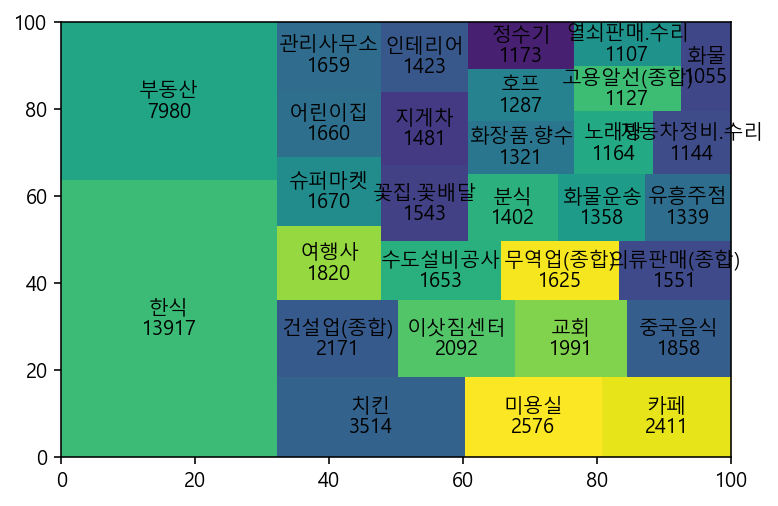

In [38]:
squarify.plot(sizes=temp2['연월'], label = temp2['구분'],
             value=temp2['연월'])